In [1]:
from cartopy import crs as ccrs
from matplotlib import pyplot as plt
from cgeniepy.model import GenieModel
import pandas as pd

## observational sst data from Tabor et al. 2016

model = GenieModel("../model/20230324.u067bc.PO4.8P8Z.SPIN")
sst = model.get_var("ocn_sur_temp").isel(time=-1)
npp = model.get_var("eco2D_Uptake_Fluxes_C").isel(time=-1)
npp = npp * 80.8

sst.array.attrs['units'] = "°C"
sst.array.attrs['long_name'] = "Sea surface temperature"
npp.array.attrs['long_name'] = "Net primary production"#fig.savefig("../output/cretaceous_ocn.png", bbox_inches="tight", dpi=300)

lat = model.get_var("lat").array
sst_zonal_mean = sst.array.mean(dim="lon")
sst_zonal_min = sst.array.min(dim="lon")
sst_zonal_max = sst.array.max(dim="lon")
npp_zonal_mean = npp.array.mean(dim="lon")

sst_tabor = pd.read_excel("../data/Tabor_Maastrichtian_proxy.xlsx")

/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-pa

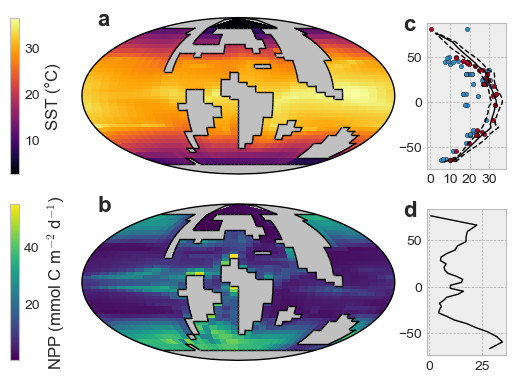

In [5]:
import matplotlib.transforms as mtransforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.style
import matplotlib as mpl
mpl.style.use('bmh')
mpl.rcParams['pdf.fonttype']=42

fig = plt.figure()
spec = fig.add_gridspec(20, 18)

## row ratio 1:1 (2+2)
## col ratio 2:1 (6+3)

def new_axis_right(ax):
    divider = make_axes_locatable(ax)
    ax_right = divider.new_horizontal(size="30%", pad=1, axes_class=plt.Axes)
    return ax_right

## Init figure and axes

#trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)

ax1 = fig.add_subplot(spec[:10, :14], projection=ccrs.Mollweide(central_longitude=-70))
ax2 = fig.add_subplot(spec[10:20, :14], projection=ccrs.Mollweide(central_longitude=-70))
sst_plot = sst.plot(ax=ax1, colorbar=False, cmap='inferno')
npp_plot = npp.plot(ax=ax2, colorbar=False, cmap='viridis')
#fig.savefig("../outp

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("left", size="3%", axes_class=plt.Axes)
cbar_sst = plt.colorbar(sst_plot, cax=cax1, orientation='vertical')
cbar_sst.set_label("SST (°C)")

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("left", size="3%", axes_class=plt.Axes)
cbar_npp = plt.colorbar(npp_plot, cax=cax2, orientation='vertical')
cbar_npp.set_label(r"NPP (mmol C m$^{-2}$ d$^{-1}$)")

ax3 = fig.add_subplot(spec[1:9, 15:19])
ax3.plot(sst_zonal_mean, lat, color="k", linewidth=1)
ax3.plot(sst_zonal_min, lat, color="k", linewidth=1, linestyle="--")
ax3.plot(sst_zonal_max, lat, color="k", linewidth=1, linestyle="--")
ax3.set_xticks([0, 10, 20, 30])

ax4 = fig.add_subplot(spec[11:19, 15:19])
ax4.plot(npp_zonal_mean, lat, color="k", linewidth=1)

import seaborn as sns
sns.scatterplot(data=sst_tabor, y="Paleo Lat", x="Proxy Temp (°C)", edgecolor = "black", ax=ax3, s=10)
sns.scatterplot(data=sst_tabor, y="Paleo Lat", x="Maa4x Model Ann Temp (°C)", edgecolor = "black", ax=ax3, s=10)
## sort value
#ax3.plot(sst_tabor["Maa4x Model Ann Temp (°C)"], sst_tabor["Paleo Lat"], '-o', linewidth = 0.1)

ax3.set(xlabel=None)
ax3.set(ylabel=None)

## labeling the subplots
ax1.text(0.05, 0.95, "a", transform=ax1.transAxes, fontsize=16, fontweight="bold")
ax2.text(0.05, 0.95, "b", transform=ax2.transAxes, fontsize=16, fontweight="bold")
ax3.text(-0.3, 0.95, "c", transform=ax3.transAxes, fontsize=16, fontweight="bold")
ax4.text(-0.3, 0.95, "d", transform=ax4.transAxes, fontsize=16, fontweight="bold")

## save figure
fig.savefig("../output/cretaceous_ocn.png", bbox_inches="tight", dpi=300)